# Loading the necessary libraries

In [ ]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# Loading images



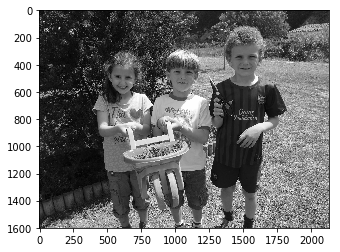

In [ ]:
#  Loading the image to be tested
test_image = cv2.imread('abc4.jpg')
test_image2 = cv2.imread('P5011490_resultado.JPG')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

Since we know that OpenCV loads an image in BGR format so we need to convert it into RBG format to be able to display its true colours. Let us write a small function for that.

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files and are located in `opencv/data/haarcascades/` folder. However, just to make things simple, you can also access them from here.Download the xml fiels and place them in data folder in the same working directory as the jupyter notebook.

### Loading the classifier for frontal face

In [4]:
haar_cascade_face = cv2.CascadeClassifier('/usr/local/lib/python2.7/dist-packages/cv2/data/haarcascade_frontalface_alt.xml')


# Face detection

We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h). 

In [57]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



        

('Faces found: ', 2)


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2

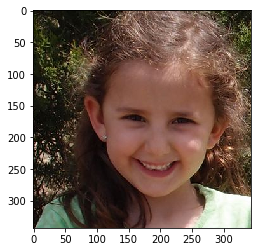

In [59]:
n=1
for (x,y,w,h) in faces_rects:
     cropped_temp = convertToRGB(test_image2)[y-100:y+h+50,x-100:x+w+50, :] 
     cv2.imwrite('image'+str(n)+'.png',convertToRGB(cropped_temp))
     plt.imshow(cropped_temp)
     #cv2.rectangle(test_image, (x-100, y-100), (x+w+40, y+h+40), (0, 255, 0), 2)
     n=n+1

     
        

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

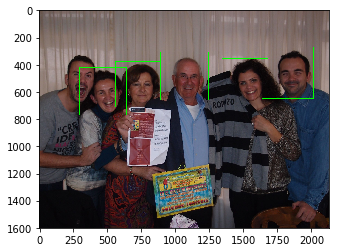

In [7]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Let us create a generalised function for the entire face detection process.

In [8]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy

### Testing the function on new image




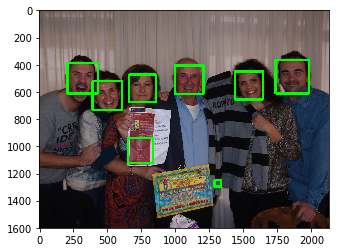

In [9]:
#loading image
test_image2 = cv2.imread('abc2.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Testing the function on a group photograph

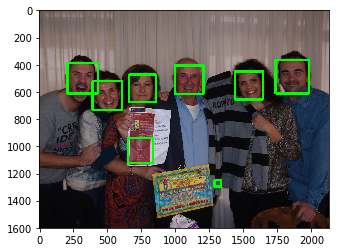

In [10]:
#loading image
test_image2 = cv2.imread('abc2.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Saving the Image

In [18]:
 #cv2.imwrite('image1.png',faces)
  

In [24]:
import os
import fnmatch
import cv2
import shutil

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haar_cascade_face = cv2.CascadeClassifier('/usr/local/lib/python2.7/dist-packages/cv2/data/haarcascade_frontalface_alt.xml')

input_path = r"/face-recognition/train_img"
output_path = r"/face-recognition/pre_img/output"
done_path = r"/face-recognition/images_cropped"

included_extensions = ['jpg','jpeg', 'png', 'gif', 'JPG', 'PNG', 'GIF', 'JPEG']
n=1
counter=10001

for root, dirs, files in os.walk(input_path, topdown=False):
    for filename in files:
        file_path=os.path.join(root, filename)
        extension=os.path.splitext(filename)[1][1:]
        if extension in included_extensions :
            print("input:"+file_path)
            try:
                #  Loading the image to be tested
                test_image = cv2.imread(file_path)
                #plt.imshow(test_image, cmap='gray')
                test_image2 = test_image.copy()

                # Converting to grayscale as opencv expects detector takes in input gray scale images
                test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

                # Displaying grayscale image
                #plt.imshow(test_image_gray, cmap='gray')

                # Applying the haar classifier to detect faces

                faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);
                print('Faces found: ', len(faces_rects))

                for (x,y,w,h) in faces_rects:
                     cropped_temp = convertToRGB(test_image2)[y-80:y+h+80,x-80:x+w+80, :] 
                     print("output:"+ output_path+'/image'+str(counter)+'.'+extension)
                     try:
                         cv2.imwrite(output_path+'/image'+str(counter)+'.'+extension,convertToRGB(cropped_temp))
                     except:
                        print("Error al guardar")
                     n=n+1
                #os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
                shutil.move(file_path, done_path+'/image'+str(counter)+'.'+extension)
            except:
                print("Error al leer")
            counter=counter+1


input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528302399478.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528305415294.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528305415822.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478512743.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10004.jpg
Error al guardar
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478513176.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478513630.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478514087.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478516444.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478516696.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1528478

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529311729459.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529356342408.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529356342818.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583730755.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583731594.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583731883.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10086.jpg
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583732865.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583733072.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1529583733208.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/152

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10157.jpg
Error al guardar
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531257391521.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531257392242.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531257397688.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531257398573.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531299658290.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10162.jpg
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531304682915.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531310386914.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531310387158.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/.thumbnails/1531337526098.jpg
('Faces f

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180511_194545.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10236.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180511_194546.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10237.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180511_194553.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10238.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180511_195314.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180512_084136.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10240.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180512_121850.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10241.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180512_165446.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10242.jp

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10281.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_131844(1).jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_131844.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_131846.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_141838.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_141842_HDR.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_165249.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_171712.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180526_185325.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180603_152018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180603_152022.jpg
('Faces 

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_092413.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124603.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10350.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124608.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10351.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124612.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124614.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124942_HDR.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180701_124953_HDR.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180703_191959.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180704_181547.jpg
('Faces found: ', 0)
input:/face-recognition/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_200218.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_200219.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image10424.jpg
output:/face-recognition/pre_img/output/image10424.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_211025.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10425.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_211026.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10426.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_211032.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10427.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180720_211033.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180721_085436.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/2

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10483.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132401.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10484.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132407.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10485.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132408.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132410.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132411.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10488.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132413.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10489.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180722_132510.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10490.jp

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10549.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180723_115612.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180723_115619.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180725_152901.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180725_201837.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20180725_201908.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10554.jpg
Error al guardar
input:/face-recognition/train_img/móvil/DCIM/Camera/20180725_201940.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image10555.jpg
output:/face-recognition/pre_img/output/image10555.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20180725_201941.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10556.jpg
input:/face-recognition/train_img/mó

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10609.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20190109_074917.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20190109_074953.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20190109_075011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20190109_200013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Camera/20190119_201112.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image10614.jpg
output:/face-recognition/pre_img/output/image10614.jpg
input:/face-recognition/train_img/móvil/DCIM/Camera/20190119_201113.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image10615.jpg
output:/face-recognition/pre_img/output/image10615.jpg
input:/face-recognition/train_img/móvil/DCIM/Google Photos/20180513_221336-COLLAGE.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/outpu

input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-11-13-23-31-36.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-01-11-36-10.png
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10676.png
Error al guardar
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-08-10-56-55.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-08-10-57-27.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-19-21-35-36-1.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-19-21-35-36.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-21-06-57-59-1.png
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/DCIM/Screenshots/Screenshot_2017-12-21-06-57-59.png
('Faces found: ', 0)
input:/face-recognit

output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/face-recognition/pre_img/output/image10738.jpg
output:/fa

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10767.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0017.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10768.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0018.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10769.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0019.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10770.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0020.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10771.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0021.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10772.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171108-WA0022.jp

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0016.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0017.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20171212-WA0

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10880.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0008.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image10881.jpg
output:/face-recognition/pre_img/output/image10881.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0011.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10884.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180120-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0033.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10945.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0034.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10946.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0035.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0036.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10948.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0037.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image10949.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0038.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0039.

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11002.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0095.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11003.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0097.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11004.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0098.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11005.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180130-WA0099.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11006.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180201-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11007.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180201-WA0021.jp

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180228-WA0041.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180302-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180303-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180303-WA0019.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180303-WA0021.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180312-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180312-WA0004.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11064.jpg
output:/face-recognition/pre_img/output/image11064.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180325-WA000

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180501-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180501-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180502-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180502-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180502-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180503-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180503-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180503-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180506-WA0

('Faces found: ', 3)
output:/face-recognition/pre_img/output/image11154.jpg
output:/face-recognition/pre_img/output/image11154.jpg
output:/face-recognition/pre_img/output/image11154.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180506-WA0085.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image11155.jpg
output:/face-recognition/pre_img/output/image11155.jpg
output:/face-recognition/pre_img/output/image11155.jpg
output:/face-recognition/pre_img/output/image11155.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180506-WA0086.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image11156.jpg
output:/face-recognition/pre_img/output/image11156.jpg
output:/face-recognition/pre_img/output/image11156.jpg
output:/face-recognition/pre_img/output/image11156.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180506-WA0087.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/outpu

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0057.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0058.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0059.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0060.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0061.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0062.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0063.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0064.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180527-WA0

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11244.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180708-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180708-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180708-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180708-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180708-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180711-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180712-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/Sent/IMG-20180714-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/trai

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171022-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171022-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171022-WA0004.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11303.jpg
output:/face-recognition/pre_img/output/image11303.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171022-WA0005.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image11304.jpg
output:/face-recognition/pre_img/output/image11304.jpg
output:/face-recognition/pre_img/output/image11304.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171022-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171023-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0005.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11365.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11366.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11367.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0008.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11368.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171031-WA0011.jpg
('Faces found: ', 0)
input:/fac

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171102-WA0036.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171103-WA0000.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11422.jpg
output:/face-recognition/pre_img/output/image11422.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171103-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171103-WA0002.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image11424.jpg
output:/face-recognition/pre_img/output/image11424.jpg
output:/face-recognition/pre_img/output/image11424.jpg
Error al guardar
output:/face-recognition/pre_img/output/image11424.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171103-WA0003.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11425.jpg
output:/face-recognition/pre_img/output/im

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11474.jpg
output:/face-recognition/pre_img/output/image11474.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171106-WA0001.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11475.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171106-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11476.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171106-WA0003.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image11477.jpg
output:/face-recognition/pre_img/output/image11477.jpg
output:/face-recognition/pre_img/output/image11477.jpg
output:/face-recognition/pre_img/output/image11477.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171106-WA0004.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image11478.jpg
output:/face-recognition/pre_img/output/image11478.jpg
o

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11518.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0003.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11519.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0004.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11520.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0005.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11521.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0007.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11522.jpg
output:/face-recognition/pre_img/output/image11522.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171112-WA0008.jpg
('Faces found: ', 0)
input:/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171115-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11565.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171116-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11570.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171117-WA0002.jpg
('Faces found: ',

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171125-WA0015.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11628.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171126-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171126-WA0001.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11630.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171126-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171126-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171126-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171127-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171128-WA0001.jpg
('Faces found: ', 0)
input:/face-r

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11683.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0005.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11687.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11688.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171204-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171205-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0009.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11751.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171209-WA0010.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11752.jpg
input:/face-r

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171212-WA0027.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171212-WA0028.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171212-WA0029.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171212-WA0030.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171213-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11811.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171213-WA0001.jpg
('Faces found: ', 12)
output:/face-recognition/pre_img/output/image11812.jpg
output:/face-recognition/pre_img/output/image11812.jpg
Error al guardar
output:/face-recognition/pre_img/output/image11812.jpg
Error al guardar
output:/face-recognition/pre_img/output/image11812.jpg
Error al guardar
output:/fa

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0011.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11855.jpg
output:/face-recognition/pre_img/output/image11855.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0012.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11856.jpg
output:/face-recognition/pre_img/output/image11856.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171216-WA0013.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image11857.jpg
output:/face-recognition/pre_img/output/image11857.jpg
output:

input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11893.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171217-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171218-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171218-WA0001.jpg
('F

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11944.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171222-WA0010.jpg
('Faces found: ', 10)
output:/face-recognition/pre_img/output/image11950.jpg
output:/face-recognition/pre_img/output/image11950.jpg
output:/face-recognition/pre_img/output/image11950.jpg
output:/face-recognition/pre_img/output/image11950.jpg
output:/face-recognition/pre_img/output/image11950.jpg
output

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image11998.jpg
output:/face-recognition/pre_img/output/image11998.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171224-WA0036.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image11999.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171224-WA0037.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171224-WA0038.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171224-WA0039.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12002.jpg
output:/face-recognition/pre_img/output/image12002.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171224-WA0040.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12003.jpg
output:/face-recognition/pre_img/output/image12003.jpg
input:/face-recognition/train_img/móvil/Me

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171225-WA0031.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image12045.jpg
output:/face-recognition/pre_img/output/image12045.jpg
output:/face-recognition/pre_img/output/image12045.jpg
output:/face-recognition/pre_img/output/image12045.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171225-WA0032.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12046.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12046.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171225-WA0033.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12047.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171226-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171226-WA0001.jpg
('Faces found: ', 8)
output:/face-recognition/pre_img/output/im

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12090.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171229-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171229-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171230-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171230-WA0003.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12094.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171230-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12095.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171230-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20171230-WA0016.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0019.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0020.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0021.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0022.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180101-WA0023.jpg
('Faces found: ', 1)
output:/face-rec

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12186.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180103-WA0021.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image12187.jpg
output:/face-recognition/pre_img/output/image12187.jpg
output:/face-recognition/pre_img/output/image12187.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180103-WA0022.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12188.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180103-WA0023.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180103-WA0024.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output/image12190.jpg
output:/face-recognition/pre_img/output/image12190.jpg
output:/face-recognition/pre_img/output/image12190.jpg
output:/face-recognition/pre_img/output/image12190.jpg
output:/face-recognition/pre_img/output/image12190.jpg
i

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180104-WA0032.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180104-WA0033.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180104-WA0036.jpeg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180104-WA0038.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180104-WA0043.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image12238.jpg
output:/face-recognition/pre_img/output/image12238.jpg
output:/face-recognition/pre_img/output/image12238.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180105-WA0001.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12239.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180105-WA0002.jpg
('Faces found: ', 3)
output:/f

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180108-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180109-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12294.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180109-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180109-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180110-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180110-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180111-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180111-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12349.jpg
output:/face-recognition/pre_img/output/image12349.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180120-WA0024.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12350.jpg
output:/face-recognition/pre_img/output/image12350.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180120-WA0025.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12351.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180120-WA0026.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12352.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12352.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180120-WA0030.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180120-WA0031.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/im

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12394.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180121-WA0040.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12395.jpg
output:/face-recognition/pre_img/output/image12395.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180121-WA0041.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12396.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12396.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180121-WA0042.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12397.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180121-WA0043.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12398.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180121-WA0044.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/im

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12452.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0019.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12454.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0020.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0021.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0022.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0023.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0024.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180127-WA0025.jpg
('Faces found: ', 0)
input:/face-r

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0006.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12522.jpg
output:/face-recognition/pre_img/output/image12522.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180201-WA0010.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12526.jpg
input:/face-recognition/train_img/móvil/Media/Wh

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12578.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0010.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12581.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180205-WA0015.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12585.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180210-WA0011.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12643.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180210-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180211-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180211-WA0004.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12646.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180211-WA0005.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12647.jpg
output:/face-recognition/pre_img/output/image12647.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180211-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180212-WA0000.jpg
('Faces found: ', 0)
input:/fac

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12701.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0015.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12702.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0016.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0017.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0019.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0020.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12707.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180216-WA0021.jpg
('Faces found: ', 0)
input:/face-re

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180219-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180219-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180219-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180219-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180219-WA0016.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180220-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180220-WA0001.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image12761.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180220-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180228-WA0008.jpg
('Faces found: ', 0)
input:/face-reco

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180303-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180303-WA0008.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12888.jpg
output:/face-recognition/pre_img/output/image12888.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180303-WA0009.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12889.jpg
output:/face-recognition/pre_img/output/image12889.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180303-WA0010.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12890.jpg
output:/face-recognition/pre_img/output/image12890.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180303-WA0011.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12891.jpg
Error al guardar
output:/face-recognition/pre_img/output/im

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image12950.jpg
output:/face-recognition/pre_img/output/image12950.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180310-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180310-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180311-WA0000.jpg
('Faces found: ', 7)
output:/face-recognition/pre_img/output/image12953.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12953.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12953.jpg
output:/face-recognition/pre_img/output/image12953.jpg
Error al guardar
output:/face-recognition/pre_img/output/image12953.jpg
output:/face-recognition/pre_img/output/image12953.jpg
output:/face-recognition/pre_img/output/image12953.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180311-WA0001.jpg
('Faces found: ', 0)
input

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180318-WA0030.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180318-WA0031.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13015.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0004.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13020.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180319-WA0005.jpg
('Faces found: ', 0)
input:/face-r

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0004.jpeg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180331-WA0012.jpg
('Faces found: ', 0)
input:/face-rec

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13148.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180402-WA0037.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13149.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180402-WA0038.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image13150.jpg
Error al guardar
output:/face-recognition/pre_img/output/image13150.jpg
Error al guardar
output:/face-recognition/pre_img/output/image13150.jpg
Error al guardar
output:/face-recognition/pre_img/output/image13150.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180402-WA0039.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13151.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180403-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13152.jpg
input:/face-recognition/train_img/móvil/Med

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180410-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13210.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180410-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180411-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13212.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180411-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180411-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180411-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180411-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13216.jpg
Error al guardar
input:/face-recognition/train_i

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180417-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180417-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180417-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180418-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180418-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180418-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180418-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180418-WA0005.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13277.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13322.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0028.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0029.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0030.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13325.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0031.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13326.jpg
output:/face-recognition/pre_img/output/image13326.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0032.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13327.jpg
output:/face-recognition/pre_img/output/image13327.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180421-WA0033.jpg
('Faces found: ', 0)
input:/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0003.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13375.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0004.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13376.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0007.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13379.jpg
output:/face-recognition/pre_img/output/image13379.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0008.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13380.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0055.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0056.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0057.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image13429.jpg
output:/face-recognition/pre_img/output/image13429.jpg
output:/face-recognition/pre_img/output/image13429.jpg
output:/face-recognition/pre_img/output/image13429.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0058.jpg
('Faces found: ', 7)
output:/face-recognition/pre_img/output/image13430.jpg
output:/face-recognition/pre_img/output/image13430.jpg
output:/face-recognition/pre_img/output/image13430.jpg
output:/face-recognition/pre_img/output/image13430.jpg
output:/face-recognition/pre_img/output/image13430.jpg
output:/face-recognition/pre_img/output/image13430.jpg
o

('Faces found: ', 7)
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
output:/face-recognition/pre_img/output/image13457.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0086.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output/image13458.jpg
output:/face-recognition/pre_img/output/image13458.jpg
output:/face-recognition/pre_img/output/image13458.jpg
output:/face-recognition/pre_img/output/image13458.jpg
output:/face-recognition/pre_img/output/image13458.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180423-WA0087.jpg
('Faces found: ', 6)
output:/face-recognition/pre_img/output/image13459.jpg
output:/face-recognition/pre_img/output/image13459

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180427-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180427-WA0005.jpg
('Faces found: ', 8)
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
output:/face-recognition/pre_img/output/image13502.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180427-WA0006.jpg
('Faces found: ', 7)
output:/face-recognition/pre_img/output/image13503.jpg
output:/face-recognition/pre_img/output/image13503.jpg
output:/face-recognition/pre_img/output/image13503.jpg
output:/face-recognition/pre_img/output/image13503.jp

('Faces found: ', 7)
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
output:/face-recognition/pre_img/output/image13557.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180501-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180501-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180501-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180501-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180501-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Imag

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13609.jpg
output:/face-recognition/pre_img/output/image13609.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180505-WA0014.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13610.jpg
output:/face-recognition/pre_img/output/image13610.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180505-WA0015.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13611.jpg
output:/face-recognition/pre_img/output/image13611.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180505-WA0016.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13612.jpg
output:/face-recognition/pre_img/output/image13612.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180505-WA0017.jpg
('Faces found: ', 8)
output:/face-recognition/pre_img/output/image13613.jpg
output:/face-recognition/pre_img/output

input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0020.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13638.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0021.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13639.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0022.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0023.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0024.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0025.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13643.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180506-WA0026.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13644.jpg
input:/face-recognition/train_i

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13675.jpg
output:/face-recognition/pre_img/output/image13675.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13677.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13678.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0008.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13679.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180508-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180513-WA0003.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image13734.jpg
output:/face-recognition/pre_img/output/image13734.jpg
output:/face-recognition/pre_img/output/image13734.jpg
output:/face-recognition/pre_img/output/image13734.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180513-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180513-WA0005.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output/image13736.jpg
output:/face-recognition/pre_img/output/image13736.jpg
output:/face-recognition/pre_img/output/image13736.jpg
output:/face-recognition/pre_img/output/image13736.jpg
output:/face-recognition/pre_img/output/image13736.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180514-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp I

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180522-WA0010.jpg
('Faces found: ', 1)
output:/face-rec

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13857.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180526-WA0007.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image13858.jpg
output:/face-recognition/pre_img/output/image13858.jpg
output:/face-recognition/pre_img/output/image13858.jpg
output:/face-recognition/pre_img/output/image13858.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180526-WA0008.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image13859.jpg
output:/face-recognition/pre_img/output/image13859.jpg
output:/face-recognition/pre_img/output/image13859.jpg
output:/face-recognition/pre_img/output/image13859.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180526-WA0009.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13860.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180526-WA0010.jpg
('Faces found: ', 1)
o

output:/face-recognition/pre_img/output/image13886.jpg
output:/face-recognition/pre_img/output/image13886.jpg
output:/face-recognition/pre_img/output/image13886.jpg
output:/face-recognition/pre_img/output/image13886.jpg
output:/face-recognition/pre_img/output/image13886.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0012.jpg
('Faces found: ', 34)
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face-recognition/pre_img/output/image13887.jpg
output:/face

('Faces found: ', 13)
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
output:/face-recognition/pre_img/output/image13892.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0018.jpg
('Faces found: ', 11)
output:/face-recognition/pre_img/output/image13893.jpg
output:/face-recognition/pre_img/output/image13893.jpg
output:/face-recognition/pre_img/output/image

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0033.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image13908.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0034.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13909.jpg
output:/face-recognition/pre_img/output/image13909.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0035.jpg
('Faces found: ', 7)
output:/face-recognition/pre_img/output/image13910.jpg
output:/face-recognition/pre_img/output/image13910.jpg
output:/face-recognition/pre_img/output/image13910.jpg
output:/face-recognition/pre_img/output/image13910.jpg
output:/face-recognition/pre_img/output/image13910.jpg
Error al guardar
output:/face-recognition/pre_img/output/image13910.jpg
output:/face-recognition/pre_img/output/image13910.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0036.jpg
('Fac

('Faces found: ', 3)
output:/face-recognition/pre_img/output/image13944.jpg
output:/face-recognition/pre_img/output/image13944.jpg
output:/face-recognition/pre_img/output/image13944.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180527-WA0099.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180528-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180528-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180528-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180529-WA0000.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13949.jpg
output:/face-recognition/pre_img/output/image13949.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180529-WA0001.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image13950.jpg
Error a

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180604-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180604-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180605-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180606-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180606-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180606-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14000.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180606-WA0003.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14001.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180606-WA0004.jpg
('Faces found: ', 1)
output:/face-

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0017.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0019.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14050.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0022.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0023.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14052.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0024.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14053.jpg
output:/face-recognition/pre_img/output/image14053.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180609-WA0025.jpg
('Faces found: ', 0)
input:/fac

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180613-WA0014.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180614-WA0010.jpg
('Faces found: ', 0)
input:/face-reco

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180618-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180618-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180618-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180618-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180619-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14172.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180619-WA0001.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14173.jpg
output:/face-recognition/pre_img/output/image14173.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180619-WA0002.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image141

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0006.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14227.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0007.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image14228.jpg
output:/face-recognition/pre_img/output/image14228.jpg
output:/face-recognition/pre_img/output/image14228.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0011.jpg
('Faces found: ', 10)
output:/face-recognition/pre_img/output/image14230.jpg
output:/face-recognition/pre_img/output/imag

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0033.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180622-WA0034.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180623-WA0000.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14254.jpg
output:/face-recognition/pre_img/output/image14254.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180623-WA0001.jpg
('Faces found: ', 10)
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg
output:/face-recognition/pre_img/output/image14255.jpg


('Faces found: ', 6)
output:/face-recognition/pre_img/output/image14276.jpg
output:/face-recognition/pre_img/output/image14276.jpg
output:/face-recognition/pre_img/output/image14276.jpg
output:/face-recognition/pre_img/output/image14276.jpg
output:/face-recognition/pre_img/output/image14276.jpg
output:/face-recognition/pre_img/output/image14276.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180623-WA0023.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output/image14277.jpg
output:/face-recognition/pre_img/output/image14277.jpg
output:/face-recognition/pre_img/output/image14277.jpg
output:/face-recognition/pre_img/output/image14277.jpg
output:/face-recognition/pre_img/output/image14277.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180623-WA0024.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output/image14278.jpg
output:/face-recognition/pre_img/output/image14278.jpg
output:/face-recognition/pre_img/output/image14278

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14312.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0011.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14313.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0012.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14314.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0013.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0014.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14316.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180624-WA0016.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14318.jpg
output:/face-recognition/pre

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14361.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180629-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180629-WA0011.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180629-WA0012.jpg
('Faces found: ', 13)
output:/face-recognition/pre_img/output/image14364.jpg
output:/face-recognition/pre_img/output/image14364.jpg
Error al guardar
output:/face-recognition/pre_img/output/image14364.jpg
output:/face-recognition/pre_img/output/image14364.jpg
Error al guardar
output:/face-recognition/pre_img/output/image14364.jpg
Error al guardar
output:/face-recognition/pre_img/output/image14364.jpg
output:/face-recognition/pre_img/output/image14364.jpg
output:/face-recognition/pre_img/output/image14364.jpg
Error al guardar
output:/face-recognition/pre_img/output/image14364.jpg
output:/face-recognition/pre_img/output

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14408.jpg
output:/face-recognition/pre_img/output/image14408.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180701-WA0022.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14409.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180701-WA0023.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14410.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180701-WA0024.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14411.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180701-WA0025.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14412.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180701-WA0026.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14413.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Imag

('Faces found: ', 8)
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
output:/face-recognition/pre_img/output/image14459.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180703-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180703-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14461.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180704-WA0000.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14462.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180704-WA0001.jpg
('Faces found: ', 1)
o

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180708-WA0026.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14506.jpg
output:/face-recognition/pre_img/output/image14506.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180708-WA0027.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14507.jpg
output:/face-recognition/pre_img/output/image14507.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180708-WA0028.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14508.jpg
output:/face-recognition/pre_img/output/image14508.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180708-WA0029.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14509.jpg
output:/face-recognition/pre_img/output/image14509.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180708-WA0030.jpg
('Faces found: ', 2)
outp

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0033.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14553.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0034.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0035.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0036.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0037.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image14557.jpg
output:/face-recognition/pre_img/output/image14557.jpg
output:/face-recognition/pre_img/output/image14557.jpg
output:/face-recognition/pre_img/output/image14557.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180709-WA0038.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14558.jpg
output:

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0028.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0029.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14604.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0030.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0031.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14606.jpg
output:/face-recognition/pre_img/output/image14606.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0032.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14607.jpg
output:/face-recognition/pre_img/output/image14607.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180710-WA0033.jpg
('Faces found: ', 1)
output:/face-recognition/pre

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0046.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0047.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0048.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0049.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14663.jpg
output:/face-recognition/pre_img/output/image14663.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0051.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image14664.jpg
output:/face-recognition/pre_img/output/image14664.jpg
output:/face-recognition/pre_img/output/image14664.jpg
output:/face-recognition/pre_img/output/image14664.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180711-WA0056.jpg
('Faces found: ', 0)
input:/

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14711.jpg
output:/face-recognition/pre_img/output/image14711.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180714-WA0006.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14712.jpg
output:/face-recognition/pre_img/output/image14712.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180714-WA0007.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14713.jpg
output:/face-recognition/pre_img/output/image14713.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180714-WA0008.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14714.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180714-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180714-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Imag

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14765.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180719-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180719-WA0005.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180719-WA0006.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14768.jpg
output:/face-recognition/pre_img/output/image14768.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180719-WA0007.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14769.jpg
output:/face-recognition/pre_img/output/image14769.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180719-WA0015.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14770.jpg
output:/face-recognition/pre_img/output/image14770.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Imag

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14816.jpg
output:/face-recognition/pre_img/output/image14816.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180720-WA0053.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14817.jpg
output:/face-recognition/pre_img/output/image14817.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180720-WA0054.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180720-WA0055.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image14819.jpg
output:/face-recognition/pre_img/output/image14819.jpg
Error al guardar
output:/face-recognition/pre_img/output/image14819.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180720-WA0056.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180720-WA0057.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/im

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0002.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0003.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0004.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0007.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0010.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0012.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180726-WA0014.jpg
('Faces found: ', 0)
input:/face-reco

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14914.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0021.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image14915.jpg
output:/face-recognition/pre_img/output/image14915.jpg
output:/face-recognition/pre_img/output/image14915.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0026.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14916.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0027.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0028.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0029.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14919.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180804-WA0032.jpg
('Faces found: ', 0)
input:/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180809-WA0013.jpg
('Faces found: ', 19)
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image14956.jpg
output:/face-recognition/pre_img/output/image1

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14986.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180809-WA0044.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image14987.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180809-WA0045.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image14988.jpg
output:/face-recognition/pre_img/output/image14988.jpg
output:/face-recognition/pre_img/output/image14988.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180809-WA0046.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image14989.jpg
output:/face-recognition/pre_img/output/image14989.jpg
output:/face-recognition/pre_img/output/image14989.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180809-WA0047.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image14990.jpg
output:/face-recognition/pre_img/output/image14990.jpg
i

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15031.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180916-WA0005.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15032.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180923-WA0009.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15033.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180929-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180929-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180929-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180929-WA0010.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15037.jpg
output:/face-recognition/pre_img/output/image15037.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0024.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0025.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15079.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0026.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0027.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0028.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15082.jpg
output:/face-recognition/pre_img/output/image15082.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0029.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15083.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0030.jpg
('Faces found: ', 0)
input:/fac

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15113.jpg
output:/face-recognition/pre_img/output/image15113.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0060.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15114.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0061.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image15115.jpg
output:/face-recognition/pre_img/output/image15115.jpg
output:/face-recognition/pre_img/output/image15115.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0062.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15116.jpg
output:/face-recognition/pre_img/output/image15116.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0063.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15117.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp I

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15158.jpg
output:/face-recognition/pre_img/output/image15158.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0106.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image15159.jpg
output:/face-recognition/pre_img/output/image15159.jpg
output:/face-recognition/pre_img/output/image15159.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0107.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image15160.jpg
output:/face-recognition/pre_img/output/image15160.jpg
output:/face-recognition/pre_img/output/image15160.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0108.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15161.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20180930-WA0110.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp I

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15212.jpg
output:/face-recognition/pre_img/output/image15212.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181206-WA0006.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181207-WA0000.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15214.jpg
Error al guardar
output:/face-recognition/pre_img/output/image15214.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181207-WA0001.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15215.jpg
output:/face-recognition/pre_img/output/image15215.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181207-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15216.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181207-WA0008.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Me

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0043.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15254.jpg
output:/face-recognition/pre_img/output/image15254.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0044.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15255.jpg
output:/face-recognition/pre_img/output/image15255.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0045.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15256.jpg
output:/face-recognition/pre_img/output/image15256.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0046.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15257.jpg
output:/face-recognition/pre_img/output/image15257.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0048.jpg
('Faces found: ', 5)
outp

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15293.jpg
Error al guardar
output:/face-recognition/pre_img/output/image15293.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0132.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15294.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0133.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15295.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0134.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0135.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0136.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15298.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0137.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15339.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0201.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15340.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181209-WA0202.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15341.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181214-WA0004.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image15342.jpg
output:/face-recognition/pre_img/output/image15342.jpg
output:/face-recognition/pre_img/output/image15342.jpg
Error al guardar
output:/face-recognition/pre_img/output/image15342.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181215-WA0001.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15343.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181215-WA0002.jpg
('Faces 

('Faces found: ', 3)
output:/face-recognition/pre_img/output/image15380.jpg
output:/face-recognition/pre_img/output/image15380.jpg
output:/face-recognition/pre_img/output/image15380.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0014.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15381.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0015.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0016.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0017.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15384.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0018.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15385.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20181225-WA0020.jpg
('Faces found: ', 2)
output:

('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15431.jpg
output:/face-recognition/pre_img/output/image15431.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190101-WA0006.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image15432.jpg
output:/face-recognition/pre_img/output/image15432.jpg
output:/face-recognition/pre_img/output/image15432.jpg
output:/face-recognition/pre_img/output/image15432.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190101-WA0007.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15433.jpg
output:/face-recognition/pre_img/output/image15433.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190101-WA0008.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15434.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190101-WA0009.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15456.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190104-WA0001.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0001.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15458.jpg
output:/face-recognition/pre_img/output/image15458.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0002.jpg
('Faces found: ', 4)
output:/face-recognition/pre_img/output/image15459.jpg
output:/face-recognition/pre_img/output/image15459.jpg
output:/face-recognition/pre_img/output/image15459.jpg
output:/face-recognition/pre_img/output/image15459.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0003.jpg
('Faces found: ', 10)
output:/face-recognition/pre_img/output/image15460.jpg
output:/face-recognition/pre_img/output/image15460.jpg
output:/face-recognition/pre_img/output/image15460.jpg


('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15484.jpg
output:/face-recognition/pre_img/output/image15484.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0028.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15485.jpg
output:/face-recognition/pre_img/output/image15485.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0029.jpg
('Faces found: ', 3)
output:/face-recognition/pre_img/output/image15486.jpg
output:/face-recognition/pre_img/output/image15486.jpg
Error al guardar
output:/face-recognition/pre_img/output/image15486.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0030.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15487.jpg
output:/face-recognition/pre_img/output/image15487.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190105-WA0031.jpg
('Faces found: ', 5)
output:/face-recognition/pre_img/output

('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190109-WA0009.jpeg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15530.jpeg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190109-WA0011.jpeg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190109-WA0013.jpeg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190109-WA0015.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15533.jpg
Error al guardar
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190109-WA0018.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190110-WA0000.jpg
('Faces found: ', 0)
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190110-WA0007.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15536.jpg
Error al guardar
input:/face-recognition/tra

('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15583.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0021.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15584.jpg
output:/face-recognition/pre_img/output/image15584.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0022.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15585.jpg
output:/face-recognition/pre_img/output/image15585.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0023.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15586.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0024.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/output/image15587.jpg
output:/face-recognition/pre_img/output/image15587.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0025.jpg
('Faces found: ', 2)
outp

('Faces found: ', 4)
output:/face-recognition/pre_img/output/image15625.jpg
output:/face-recognition/pre_img/output/image15625.jpg
output:/face-recognition/pre_img/output/image15625.jpg
output:/face-recognition/pre_img/output/image15625.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0063.jpg
('Faces found: ', 6)
output:/face-recognition/pre_img/output/image15626.jpg
output:/face-recognition/pre_img/output/image15626.jpg
output:/face-recognition/pre_img/output/image15626.jpg
output:/face-recognition/pre_img/output/image15626.jpg
Error al guardar
output:/face-recognition/pre_img/output/image15626.jpg
output:/face-recognition/pre_img/output/image15626.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0064.jpg
('Faces found: ', 1)
output:/face-recognition/pre_img/output/image15627.jpg
input:/face-recognition/train_img/móvil/Media/WhatsApp Images/IMG-20190119-WA0065.jpg
('Faces found: ', 2)
output:/face-recognition/pre_img/out